In [2]:
import sys
sys.path.append('../')
import numpy as np
import pandas
from utility.file_utility import FileUtility

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from utility.math_utility import get_kl_rows
from utility.visualization_utility import create_mat_plot
from clustering.hierarchical_clustering import HierarchicalClutering

In [3]:
from classifier.DNN import DNNMutliclass16S
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [35]:
def get_results(x_file, label_file, act_file, trained_lab_file, last_layer):
    X=FileUtility.load_sparse_csr(x_file).toarray()
    ACT_f=DNNMutliclass16S.make_activation_function(act_file,X, last_layer=last_layer)
    #
    labels=FileUtility.load_list(label_file)
    label_set=list(set(labels))
    label_set.sort()
    #
    trained_labels=FileUtility.load_list(trained_lab_file)
    trained_labels=list(set(trained_labels))
    trained_labels.sort()
    #
    class_idx=dict()
    for x in label_set:
        class_idx[x]=[idx for idx, y in enumerate(labels) if y==x]
    #
    kmer_mat_distrb=[]
    for x in label_set:
        kmer_mat_distrb.append(np.mean(X[class_idx[x],:], axis=0))
    #
    mat_distrb=[]
    idx_names=dict()
    for x in label_set:
        mat_distrb.append(np.mean(ACT_f[class_idx[x],:], axis=0))
        if x in trained_labels:
            idx_names[np.argmax(mat_distrb[-1])]=x
    # print top3 each class
    for idx, x in enumerate(label_set):
        if x not in trained_labels:
            print(x, [(idx_names[idx_name],mat_distrb[idx][idx_name])  for idx_name in np.array(mat_distrb[idx]).argsort()[-3:][::-1]])
            
    phen_res=get_kl_rows(np.array(mat_distrb))
    kmer_res=get_kl_rows(np.array(kmer_mat_distrb))
    
    create_mat_plot(phen_res,[x.replace('_',' ') for x in label_set], '', 'temp', '' ,'', cmap='Blues', filetype='pdf', rx=90, annot=False)
    create_mat_plot(kmer_res,[x.replace('_',' ') for x in label_set], '', 'temp', '' ,'', cmap='Blues', filetype='pdf', rx=90, annot=False)

    phen_nwk=HierarchicalClutering(phen_res, [x.replace('_',' ') for x in label_set]).nwk
    kmer_nwk=HierarchicalClutering(kmer_res, [x.replace('_',' ') for x in label_set]).nwk
    return phen_nwk, kmer_nwk

activated_carbon [('soil', 0.49489468), ('freshwater_sediment', 0.1947228), ('marine', 0.13057819)]
anaerobic_digester [('soil', 0.4162192), ('rhizosphere', 0.13282183), ('marine', 0.12463369)]
beach_sand [('sediment', 0.46349144), ('marine_sediment', 0.35247195), ('ant_fungus_garden', 0.10518864)]
biofilm [('soil', 0.24232136), ('sediment', 0.22501022), ('marine', 0.17237982)]
hydrothermal_vent [('marine_sediment', 0.31954411), ('sediment', 0.26740721), ('marine', 0.1018405)]
hypersaline_lake [('sediment', 0.58783937), ('ant_fungus_garden', 0.15883987), ('marine_sediment', 0.15441906)]
ice [('marine', 0.19694732), ('marine_sediment', 0.1939819), ('soil', 0.17116588)]
indoor [('marine', 0.29682836), ('food', 0.1881915), ('sediment', 0.17532609)]
microbial_mat [('bioreactor_sludge', 0.39099434), ('marine_sediment', 0.19015095), ('freshwater', 0.10914017)]
mine_drainage [('marine', 0.23011331), ('sediment', 0.16024482), ('marine_sediment', 0.15885915)]
oil_production_facility [('activate

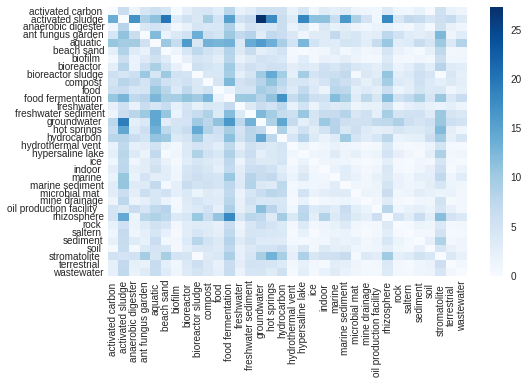

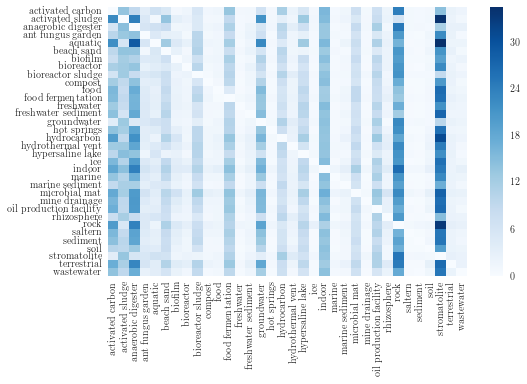

('(((((food fermentation:30.15,aquatic:30.15):0.44,((hydrocarbon:18.49,freshwater sediment:18.49):5.16,((stromatolite:2.89,bioreactor sludge:2.89):11.66,compost:14.55):9.11):6.94):4.09,((rhizosphere:20.56,groundwater:20.56):1.74,(hot springs:15.44,ant fungus garden:15.44):6.86):12.38):6.10,(((((microbial mat:5.23,freshwater:5.23):7.04,oil production facility:12.27):2.25,bioreactor:14.52):2.12,food:16.63):4.78,((((((rock:4.51,biofilm:4.51):1.23,(terrestrial:3.22,indoor:3.22):2.51):0.48,((((saltern:1.74,mine drainage:1.74):0.21,ice:1.95):1.24,hydrothermal vent:3.19):1.65,wastewater:4.84):1.38):2.10,((soil:2.76,activated carbon:2.76):2.19,anaerobic digester:4.95):3.37):3.19,marine:11.51):1.15,(((hypersaline lake:2.72,beach sand:2.72):1.34,sediment:4.06):5.76,marine sediment:9.83):2.83):8.76):19.38):14.13,activated sludge:54.92);',
 '((((((((marine:5.97,hot springs:5.97):1.41,((mine drainage:2.80,ice:2.80):2.51,saltern:5.32):2.06):5.12,terrestrial:12.49):2.37,microbial mat:14.87):7.70,indo

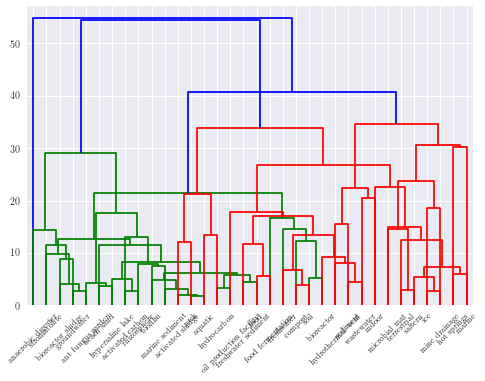

In [36]:
get_results('../../datasets/processed_data/eco_all_classes/6-mer_eco_restrictedmer_all.npz', '../../datasets/processed_data/eco_all_classes/eco_label_restrictedkmer_all.txt', '../../datasets/results/eco_10000/classifiers/nn_layers_mlp_1024-0.2-512-0.2-512_0.88.pickle', '../../datasets/processed_data/eco/K/eco_label_restrictedkmer.txt', 18)

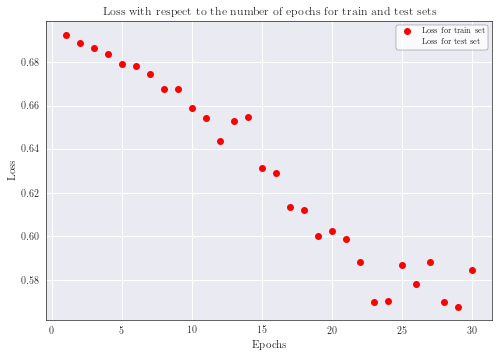

In [6]:
DNNMutliclass16S.load_history('../../datasets/results/crohn/classifier/nn_mlp_1024-0.2-256-0.1_0.64.pickle','../../datasets/figures/paper_figures/tep')

In [ ]:
'../../datasets/results/crohn/classifier/nn